# Maximum Likelihood Estimation (MLE)

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update({'font.size':16})
import scipy.stats

### Independent variable(s): $x$ and dependent variable: $y$ 

### $y$ is *distributed according* to a function:
- $p(y) = f(\mu,\sigma,...)$, where f is a probability distribution
- Also sometimes written as y ~ $f(\mu,\sigma,...)$  

### $\mu$ (and $\sigma$, etc.) are *equal* to function like:
- $\mu = g(x)$

## Altogether, this is our *statistical model* of the data

## When does the variance depend on the mean, and when are the two independent?  

## $p(y) = f(y,\mu,\sigma)$
- Normal distribution
- Lognormal distribution
- Binomial distribution (via N)
- e.g. possibly negative measurements, sample-size dependent phenomena

## $p(y) = f(y,\mu)$
- Exponential distribution
- Poisson distribution
- e.g. counts, intervals

## We win by estimating the parameters ($\mu$, $\sigma$, etc.) that maximize the likelihood of the data given the model: 
- We want the values of e.g. $\mu$ for which the data is the least outrageous. 
- In other words we want to maximize $p(y|\mu,x)$
- This is simply a generalization of curve fitting, which is itself a generalization of linear regression.  

In [2]:
# Functions mu = g(x)

def linear(x, m=3, b=1):
    return m*x + b

def inverse(x, m=3, b=0.25):
    return 1/(m*x+b)

def logarithm(x, m=0.25, b=4.5):
    return b + np.log(m*x+0.01)

def sigmoidal(x, m=10, b=0.5):
    return 4/(1+np.exp(-m*(x-b)))

In [3]:
# Distributions y ~ p(mu)

def normal(x,var=0.5):
    return scipy.stats.norm.rvs(loc=x,scale=np.ones(x.shape)*var)

def exponential(x):
    return scipy.stats.expon.rvs(scale=x)

def poisson(x):
    return scipy.stats.poisson.rvs(x)

def binomial(x,n=4):
    return scipy.stats.binom.rvs(n,x/n)

In [4]:
def plots(all=True):
    x = np.linspace(0.01,1,100)
    fig,axes = plt.subplots(4,4,sharex=True,sharey=False,figsize=(15,10))
    for i,func in enumerate([linear,inverse,logarithm,sigmoidal]):
        for j,distribution in enumerate([normal,exponential,poisson,binomial]):
            y_mean = func(x)
            y = distribution(y_mean)
            if i==j or all:
                axes[i,j].plot(x,y_mean,'rgbm'[j],linewidth=5)
                axes[i,j].scatter(x,y,color='k')
            if i!=j and not all:
                axes[i,j].axis('off')
            if i==j and not all:
                axes[i,j].set_ylabel(func.__name__)
                axes[i,j].set_xlabel(distribution.__name__)
            axes[i,0].set_ylabel(func.__name__)
            axes[3,j].set_xlabel(distribution.__name__)

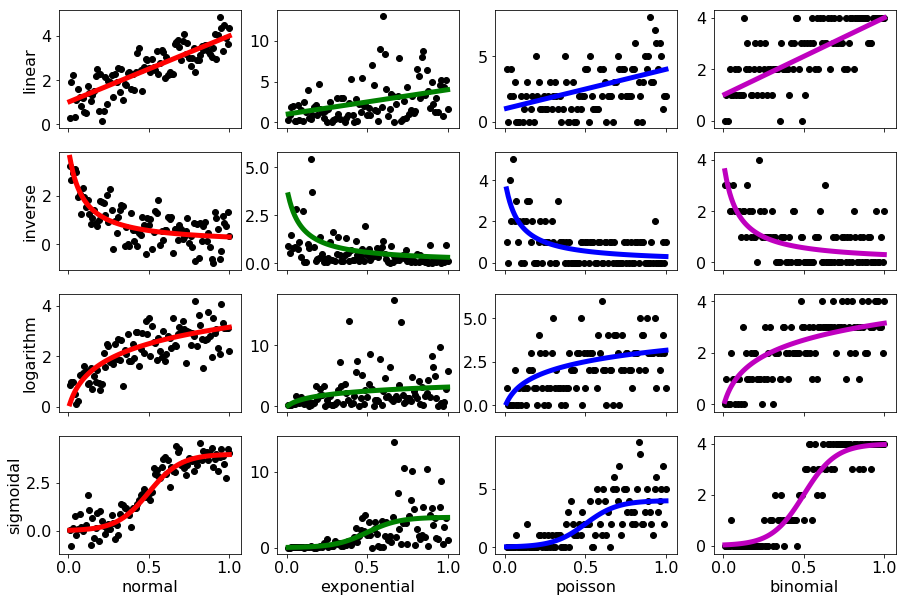

In [15]:
plots()

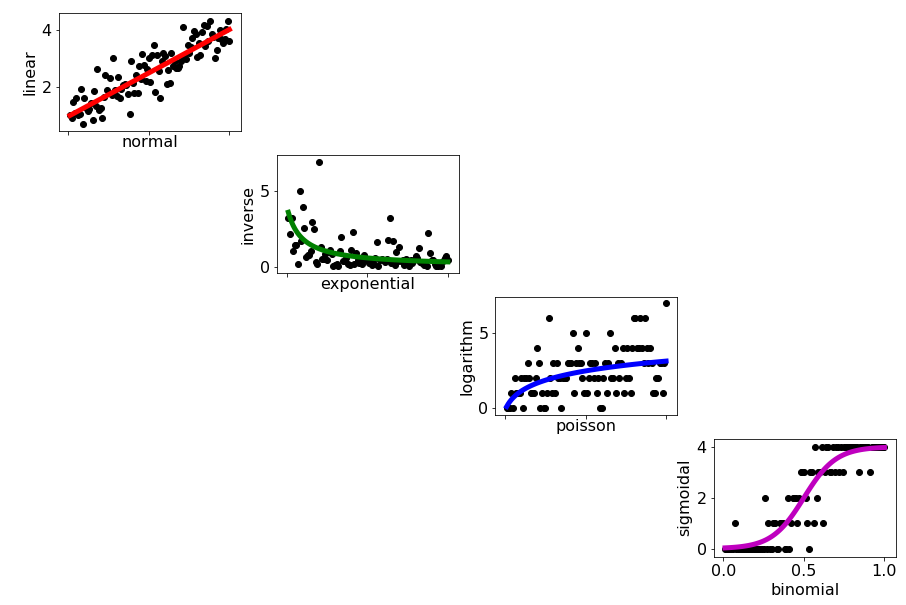

In [16]:
plots(all=False)

## Student drawings

![sunlight](images/student-drawings-2/sunlight.png)

![cloudy](images/student-drawings-2/cloudy.png)

![drug](images/student-drawings-2/drug.png)

![firing](images/student-drawings-2/firing.png)

![growth-hormone](images/student-drawings-2/growth-hormone.png)

![ecoli](images/student-drawings-2/ecoli.png)

![algae](images/student-drawings-2/algae.png)

![turtles](images/student-drawings-2/turtles.png)

![heart-rate](images/student-drawings-2/heart-rate.png)

## Maximum likelihood estimation example

### $\mu = x^z$

### $y \sim exponential(\mu)$

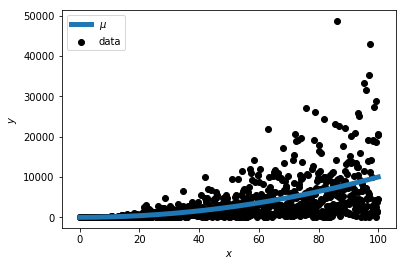

In [7]:
x = np.linspace(0.01,100,1000)
z = 2 # The power relating y to x
mu = x**z
y = exponential(mu)
plt.plot(x,mu,linewidth=5,label='$\mu$')
plt.scatter(x,y,color='k',label='data');
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend();

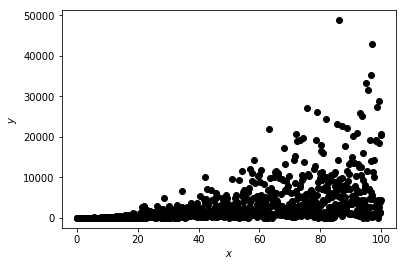

In [8]:
plt.scatter(x,y,color='k',label='data');
plt.xlabel('$x$')
plt.ylabel('$y$');

### Exponential distribution
$p(y|\mu) = (1/\mu)*e^{-y/\mu}$

### The probability of the data $y$ (given $\mu$) is the product of the probabilities of each of the individual data points $y_1$, $y_2$, $y_3$, ....  
$p(y|\mu) = p(y_1|\mu_1)*p(y_2|\mu_2)*p(y_3|\mu_3)*...$

$= (1/\mu_1)*e^{-y_1/\mu_1}*(1/\mu_2)*e^{-y_2/\mu_2}*(1/\mu)*e^{-y_3/\mu_3}*...$

$= (1/x_1^z)*e^{-y_1/x_1^z}*(1/x_2^z)*e^{-y_2/x_2^z}*(1/x_3^z)*e^{-y_3/x_3^z}*...$

## We want to find the $\mu$ that maximizes this probability

$dp/dz = 0$

### Brutal chain rule problem!

### We circumvent this by instead finding $d(log(p))/dz = 0$

$log(p(y|\mu)) = log(p(y_1|\mu_1)*p(y_2|\mu_2)*p(y_3|\mu_3)*...)$

$ = log(p(y_1|\mu_1)) + log(p(y_2|\mu_2)) + log(p(y_3|\mu_3)) + ...$

$ = log((1/\mu_1)*e^{-y_1/\mu_1}) + log((1/\mu_2)*e^{-y_2/\mu_2}) + log((1/\mu_3)*e^{-y_3/\mu_3}) + ...$

$ = log(1/\mu_1) + log(e^{-y_1/\mu_1}) + log(1/\mu_2) + log(e^{-y_2/\mu_2}) + log(1/\mu_3) + log(e^{-y_3/\mu_3}) + ...$

$ = \Sigma [log(1/\mu_i) -y_i/\mu_i]$

$ = \Sigma [log(1/x_i^z) -y_i/x_i^z]$

#### Since we are differentiating with respect to z, all the terms in the sum will look similar  

$log(p(y|\mu)) = \Sigma [log(1/x_i^z) -y_i/x_i^z]$

$d(log(p))/dz = \Sigma [log(x_i)*(y/x_i^z-1)] = 0$

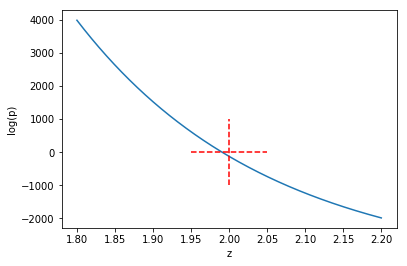

In [9]:
def logp(x,y,z):
    return np.sum(np.log(x)*(y/x**z-1))
zs = np.linspace(1.8,2.2,1000)
logps = [logp(x,y,zi) for zi in zs]
plt.plot(zs,logps)
plt.plot([2,2],[-1000,1000],'r--')
plt.plot([1.95,2.05],[0,0],'r--')
plt.xlabel('z')
plt.ylabel('log(p)');

## Could we have just done linear regression on the log-transformed data?

## $y = x^z$

## $log(y) = log(x^z) = z*log(x)$

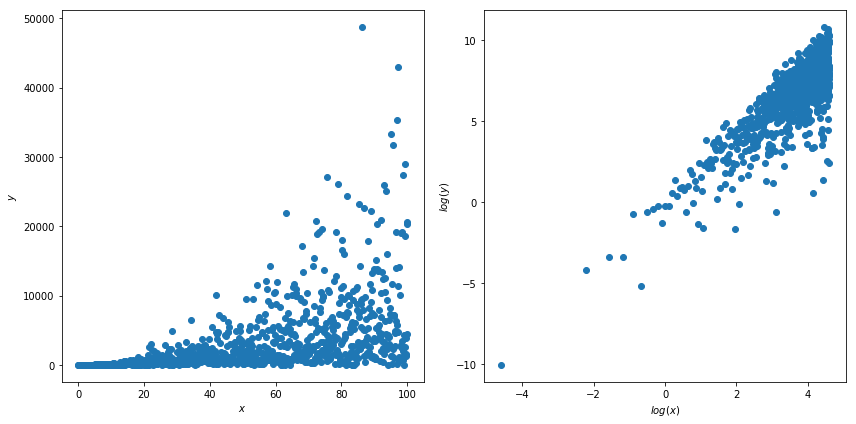

In [10]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].scatter(x,y);
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$y$')
ax[1].scatter(np.log(x),np.log(y));
ax[1].set_xlabel('$log(x)$')
ax[1].set_ylabel('$log(y)$')
plt.tight_layout();

In [11]:
from scipy.stats import linregress
result = linregress(np.log(x), np.log(y))
print("Slope = %.2f" % result.slope)
print("Intercept = %.2f" % result.intercept)

Slope = 1.94
Intercept = -0.39


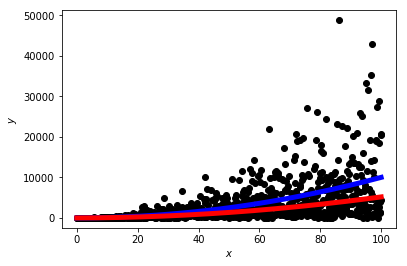

In [12]:
plt.scatter(x,y,color='k');
plt.plot(x,x**2,'b',linewidth=5)
plt.plot(x,np.exp(result.intercept)*(x**result.slope),'r',linewidth=5)
plt.xlabel('$x$')
plt.ylabel('$y$');